# Implementation of the hands-on example from the section “Predicting Atomization Energies” in the paper Rupp2015.

## Load data

In [7]:
import numpy as np
from ase.io import read

# Load the molecular structures and atomization energies from the file dsgdb7ae2.xyz.
species = read("dsgdb7ae2.xyz", index=":")

# Count the non-H atoms in each molecule to reproduce Table 3.
count = []
for i in range (len(species)):
    atoms = species[i]
    #print(atoms.symbols)
    del atoms[[atom.index for atom in atoms if atom.symbol=='H']]
    count.append(len(atoms))   
#print(count)

i=0
while count[i] < 1: #zero H
    i += 1
    a = i
    a = 0
#print(a) 

while count[i] < 2: #less than one H
    i += 1
    b = i
#print(b) 

while count[i] < 3: #less than two H
    i += 1
    c = i
#print(c) 
    
while count[i] < 4: #less than three H
    i += 1
    d = i
#print(d) 

while count[i] < 5: #less than four H
    i += 1
    e = i
#print(e) 

while count[i] < 6: #less than five H
    i += 1
    f = i
#print(f) 

while count[i] < 7: #less than six H
    i += 1
    g = i
#print(i) 

i = len(species) #less than seven H
h = i
#print(h) 
 
print(" 1 non-H atoms:" + str(b-0) + "\n", "2 non-H atoms:" + str(c-b) + "\n", "3 non-H atoms:" + str(d-c)+ "\n", 
      "4 non-H atoms:" + str(e-d)+ "\n", "5 non-H atoms:" + str(f-e)+ "\n", "6 non-H atoms:" + str(g-f) + "\n",
      "7 non-H atoms:" + str(h-g))

 1 non-H atoms:1
 2 non-H atoms:3
 3 non-H atoms:12
 4 non-H atoms:43
 5 non-H atoms:157
 6 non-H atoms:935
 7 non-H atoms:5951


In [ ]:
# Create a training set and the prediction set
# Select all k molecules with four or fewer non-H atoms. 
# Assign selected molecules to the training set, and all others to the prediction set.

#k_train = 40
#split = (len(species) - k_train)/(1000 - k_train)
#PredictionSet_idx = np.linspace(41, len(species), round(split)).astype(int)
#print(PredictionSet_idx)



In [ ]:
# Create a hold-out set (unfinished)
# From the training set, select 100 molecules with five or more non-H atoms, stratified by number of atoms, and assign them to the hold-out set.

#k_holdout = 100






## Use dscribe's implementation of Coulomb matrix (CM)

In [71]:
from dscribe.descriptors import CoulombMatrix

# Setting up the CM descriptor
cm = CoulombMatrix(
    n_atoms_max=23,
    permutation='sorted_l2'
)

In [72]:
from ase.build import molecule
from ase import Atoms

# Molecule created as an ASE.Atoms
species = read("dsgdb7ae2.xyz", index=":")

samples = []
for i in range (len(species)):
    atoms = species[i]
    #print(atoms.symbols)
    samples.append(atoms)   
print(samples[1])


Atoms(symbols='C2H6', pbc=False)


In [73]:
# Create output for multiple system

coulomb_matrices = cm.create(samples, n_jobs=2)  # Parallel
print(coulomb_matrices)
print("flattened", coulomb_matrices.shape)

[[ 36.8581052    5.40834831   5.40832102 ...   0.           0.
    0.        ]
 [ 36.8581052   23.69699443   2.77198579 ...   0.           0.
    0.        ]
 [ 36.8581052   27.04631682   5.52875441 ...   0.           0.
    0.        ]
 ...
 [388.02344103  66.85246943  44.96901484 ...   0.           0.
    0.        ]
 [388.02344103  66.66939757  45.19845041 ...   0.           0.
    0.        ]
 [388.02344103  66.66601077  45.10724451 ...   0.           0.
    0.        ]]
flattened (7102, 529)


## Visualize data

In [15]:
# set CoulombMatrix as features
x = coulomb_matrices

# set energies as target labels

data_total_energies = [float(list(molecule.info)[1]) for molecule in species]
#print(data_total_energies)
y = data_total_energies

#print(len(y))

In [17]:
import math, random

rand_mol = random.randint(0, len(y))
print(x[rand_mol].)

[73.51669472 19.38447794 13.06706876 19.65362436 34.19934847 16.45907741
 12.73132159  8.06456914  2.065157    2.5216396   1.79211069  3.09919978
  3.91825396  3.86873226  2.46745442  1.64575051  1.73074241  1.96677358
  1.96634919  0.          0.          0.          0.         19.38447794
 53.3587074  16.44828878 28.55840287 17.08579404 16.90728902 17.02741923
  2.60983158  6.69773258  6.68787656  2.56513908  2.54242796  2.04374473
  2.55034446  2.03814886  1.77341783  2.55356912  2.0376054   2.56602925
  0.          0.          0.          0.         13.06706876 16.44828878
 53.3587074  16.73478929 10.92263294 28.72173793 14.05348541  1.49921475
  2.59022486  1.77130954  6.70048017  3.32302938  1.69569967  1.48955451
  3.33722591  6.69446554  2.62254174  2.09835784  1.74446417  0.
  0.          0.          0.         19.65362436 28.55840287 16.73478929
 36.8581052  23.23424809 23.15730134 23.30991392  2.17850147  2.87669469
  2.88959603  2.13680094  2.72126459  2.73261126  2.7153494

<Figure size 432x288 with 0 Axes>

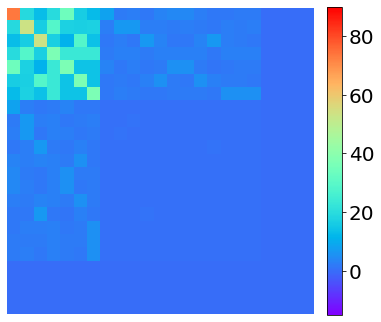

In [19]:
# Visualize the Coulomb matrix of the random molecule.

import matplotlib.pyplot as plt

shape = (23, 23)
mat = x[rand_mol].reshape(shape)

plt.figure()
plt.figure(figsize = (6,6))
plt.imshow(mat, origin="upper", cmap='rainbow', vmin=-15, vmax=90, interpolation='nearest')
plt.colorbar(fraction=0.046, pad=0.04).ax.tick_params(labelsize=20)
plt.axis('off')
plt.show()

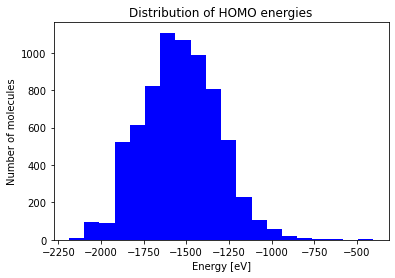

Mean value of HOMO energies in QM7 dataset: -1536.32 eV


In [26]:
# Visualize the target data by plotting the distribution of HOMO energies in the dataset.

plt.hist(y, bins=20, density=False, facecolor='blue')
plt.xlabel("Energy [eV]")
plt.ylabel("Number of molecules")
plt.title("Distribution of HOMO energies")
plt.show()

## mean value of distribution
print("Mean value of HOMO energies in QM7 dataset: %0.2f eV" %np.mean(y))

## Setting data

In [60]:
## shuffle the data

c = list(zip(x, y))
random.shuffle(c)

x, y = zip(*c)

x = np.array(x)
y = np.array(y)


In [74]:
# decide how many samples to take from the database for training and testing
n_train = 6000
n_test = 1000

# split data in training and test
# take first n_train molecules for training
x_train  = x[0:n_train] 
y_train = y[0:n_train]

# take the next n_test data for testing
x_test = x[n_train:n_train + n_test]
y_test = y[n_train:n_train + n_test]

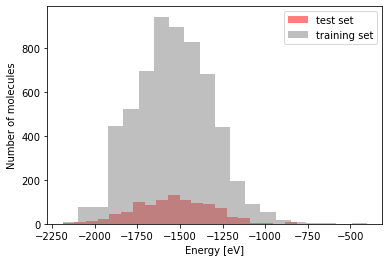

Mean value of HOMO energies in training set: -1535.82 eV
Mean value of HOMO energies in test set: -1536.80 eV


In [75]:
plt.hist(y_test, bins=20, density=False, alpha=0.5, facecolor='red', label='test set')
plt.hist(y_train, bins=20, density=False, alpha=0.5, facecolor='gray', label='training set')
plt.xlabel("Energy [eV]")
plt.ylabel("Number of molecules")
plt.legend()
plt.show()

## mean value of distributions
print("Mean value of HOMO energies in training set: %0.2f eV" %np.mean(y_train))
print("Mean value of HOMO energies in test set: %0.2f eV" %np.mean(y_test))

## Use sklearn's implementation of kernel ridge regression (KRR) model 

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score

# set up grids for alpha and gamma hyperparameters. 
# first value: lower bound; second value: upper bound; 
# third value: number of points to evaluate (here set to '3' --> '-2', '-1' and '0' are evaluated)
# --> make sure to change third value as well when changing the bounds!
alpha = np.logspace(-4, -2, 3)
gamma = np.logspace(-4, -2, 3)

cv_number = 3 ## choose into how many parts training set is divided for cross-validation
kernel = 'rbf' # select kernel function here ('rbf': Gaussian kernel, 'laplacian': Laplacian kernel)
scoring_function = 'neg_mean_absolute_error' # it is called "negative" because scikit-learn interprets
                                             # highest scoring value as best, but we want small errors

## define settings for grid search routine in scikit-learn with above defined grids as input

grid_search = GridSearchCV(KernelRidge(),  #machine learning method (KRR here)
                           [{'kernel':[kernel],'alpha': alpha, 'gamma': gamma}], 
                           cv = cv_number, 
                           scoring = scoring_function,
                           verbose=1000)  ## produces detailed output statements of grid search 
                                          # routine so we can see what is computed
    
# call the fit function in scikit-learn which fits the Coulomb matrices in the training set 
# to their corresponding HOMO energies.
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3; 1/9] START alpha=0.0001, gamma=0.0001, kernel=rbf......................
[CV 1/3; 1/9] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-9.623 total time=   1.6s
[CV 2/3; 1/9] START alpha=0.0001, gamma=0.0001, kernel=rbf......................
[CV 2/3; 1/9] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-9.844 total time=   1.5s
[CV 3/3; 1/9] START alpha=0.0001, gamma=0.0001, kernel=rbf......................
[CV 3/3; 1/9] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-9.866 total time=   1.5s
[CV 1/3; 2/9] START alpha=0.0001, gamma=0.001, kernel=rbf.......................
[CV 1/3; 2/9] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-128.803 total time=   1.5s
[CV 2/3; 2/9] START alpha=0.0001, gamma=0.001, kernel=rbf.......................
[CV 2/3; 2/9] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-127.063 total time=   1.5s
[CV 3/3; 2/9] START alpha=0.0001, gamma=0.001, kernel=rbf.....................

GridSearchCV(cv=3, estimator=KernelRidge(),
             param_grid=[{'alpha': array([0.0001, 0.001 , 0.01  ]),
                          'gamma': array([0.0001, 0.001 , 0.01  ]),
                          'kernel': ['rbf']}],
             scoring='neg_mean_absolute_error', verbose=1000)

In [53]:
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(-means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

9.778 (+/-0.220) for {'alpha': 0.0001, 'gamma': 0.0001, 'kernel': 'rbf'}
130.218 (+/-6.618) for {'alpha': 0.0001, 'gamma': 0.001, 'kernel': 'rbf'}
1505.276 (+/-4.808) for {'alpha': 0.0001, 'gamma': 0.01, 'kernel': 'rbf'}
9.749 (+/-0.225) for {'alpha': 0.001, 'gamma': 0.0001, 'kernel': 'rbf'}
130.303 (+/-6.617) for {'alpha': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}
1505.303 (+/-4.807) for {'alpha': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
10.816 (+/-0.208) for {'alpha': 0.01, 'gamma': 0.0001, 'kernel': 'rbf'}
131.136 (+/-6.599) for {'alpha': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}
1505.566 (+/-4.798) for {'alpha': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}


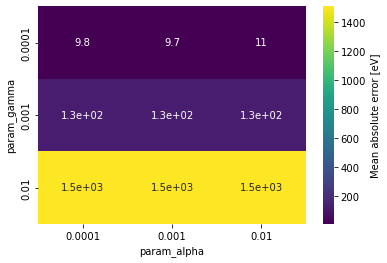

The best combinations of parameters are {'alpha': 0.001, 'gamma': 0.0001, 'kernel': 'rbf'} with a score of 9.749 eV on the validation set.


In [54]:
import pandas as pd
import seaborn as sns

results = pd.DataFrame(grid_search.cv_results_)
#pd.DataFrame(grid_search.cv_results_)

pvt = pd.pivot_table(results, values='mean_test_score', 
                     index='param_gamma', columns='param_alpha')
heatmap = sns.heatmap(-pvt, annot=True, cmap='viridis', cbar_kws={'label': "Mean absolute error [eV]"})
figure = heatmap.get_figure()
plt.show()


print("The best combinations of parameters are %s with a score of %0.3f eV on the validation set."
      % (grid_search.best_params_, -grid_search.best_score_))

Mean absolute error on test set: 8.715 eV


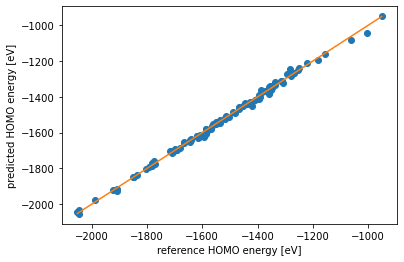

R^2 score on test set: 0.997


In [55]:
# predicted HOMO energies for all test molecules

y_pred = grid_search.predict(x_test) # scikit-learn automatically takes the best combination
                                     # of hyperparameters from grid search

print("Mean absolute error on test set: %0.3f eV" %(np.abs(y_pred-y_test)).mean())

# do the regression plot
plt.plot(y_test, y_pred, 'o')
plt.plot([np.min(y_test),np.max(y_test)], [np.min(y_test),np.max(y_test)], '-')
plt.xlabel('reference HOMO energy [eV]')
plt.ylabel('predicted HOMO energy [eV]')
plt.show()
print("R^2 score on test set: %.3f" % r2_score(y_test, y_pred))

## Compare your results for CM to Rupp’s. 

## Now use dscribe's implementation of SOAP representation and compare predictions to CM.

In [56]:
from dscribe.descriptors import SOAP

# Setting up the SOAP descriptor
soap = SOAP(
    species=["H"],
    periodic=False,
    rcut=5.0,
    sigma=0.5,
    nmax=3,
    lmax=0,
)